# Solución a la Ecuación de Calor Bidimensional

## Con Condiciones de Dirichlet en Coordenadas Polares

![calor](https://t1.rbxcdn.com/af592931f3ac990bf51a387228788c6d)

__Una breve introducción:__ La ecuación del calor es una importante ecuación diferencial en derivadas parciales que describe la variación y la evolución del calor (o de la temperatura) en una región a lo largo intervalo de tiempo.

El matemático y físico francés Jean Baptiste Joseph Fourier (1768-1830) fue pionero en el estudio
de la transferencia del calor en sólidos y fue quien dedujo la denominada Ecuación del Calor:

$$\displaystyle {k\frac {\partial u}{\partial t}}-\nabla ^{2}u=0$$

En nuestro caso buscaremos una función que sea solución de la ecuación en una región polar del tipo $ 0\leq r \leq 10;0\leq t  $. Para esto se usará las siguientes condiciones de frontera.
 $$u(a,\theta,t)=T_0$$
 $$u(r, \theta,0)=P(r,\theta)$$ 
 
Donde $T_0$ es una contante, es decir es una temperatura fija, la idea es que la placa se calienta en medio y luego se deja enfriar, de manera que en el borde de la placa circular, la temperatura no cambia.

__Planteamiento:__ para darle solución escogeremos previamente una malla en $(r,\theta)$ y además vamos a tomar un intervalo de tiempo finito $[0,t_0]$
 
Discreticemos $\nabla^2$ en coordenadas polares, para ello recordemos lo siguiente:
 
$$\Delta f=\nabla ^{2}f={\partial ^{2}f \over \partial r ^{2}}+{1 \over r }{\partial f \over \partial r }+{1 \over r ^{2}}{\partial ^{2}f \over \partial \theta ^{2}}$$

Tomando las aproximaciones
$$\frac {\partial f(r,\theta,t)}{\partial r} \approx \frac {f(r+h,\theta,t)-f(r-h,\theta,t)}{2h} $$
$$\frac {\partial^2 f(r,\theta,t)}{\partial r^2} \approx \frac{f(r+h,\theta,t)+f(r-h,\theta,t)-2f(r,\theta,t)}{h^2}$$
$$\frac {\partial^2 f(r,\theta,t)}{\partial \theta^2} \approx \frac{f(r,\theta+h,t)+f(r,\theta-h,t)-2f(r,\theta,t)}{h^2}$$
$$\frac {\partial f(r,\theta,t)}{\partial t} \approx \frac {f(r,\theta,t+s)-f(r,\theta,t-s)}{2s} $$

Por lo que nuestro laplaciano es:
$$\nabla ^{2}f(r,\theta,t)=\frac{f(r+h,\theta,t)+f(r-h,\theta,t)-2f(r,\theta,t)}{h^2} + \frac {f(r+h,\theta,t)-f(r-h,\theta,t)}{2rh} + \frac{f(r,\theta+h,t)+f(r,\theta-h,t)-2f(r,\theta,t)}{r^2h^2}$$

En nuestro caso además el operador diferencial por discretizar es $k\frac{\partial}{\partial t} -\nabla^2$, por lo cual queda discretizado por:

$$k\frac {f(r,\theta,t+s)-f(r,\theta,t-s)}{2s} - \frac{f(r+h,\theta,t)+f(r-h,\theta,t)-2f(r,\theta,t)}{h^2} + \frac {f(r+h,\theta,t)-f(r-h,\theta,t)}{2rh} + \frac{f(r,\theta+h,t)+f(r,\theta-h,t)-2f(r,\theta,t)}{r^2h^2}$$

Antes de crear el programa vamos a analizar la ruta que debemos seguir para aplicar diferencias finitas:

Tomando una malla homogenea que dé el usuario através del parámetro $h_0$, el cual implementaremos con linspace

reescribimos nuestra fórmula como :

$$k\frac{\partial f_{ij}}{\partial t} - \frac{f_{i+1j}-2f_{ij}+f_{i-1j}}{h^2} + \frac {f_{i+1j}-f_{i-1j}}{2rh} + \frac{f_{ij+1}-2f_{ij}+f_{ij-1}}{r^2d^2}=0$$
Donde d es el espaciamiento de la malla en $\theta$ y $h$ en el radio.

Ahora bien, considerando cada $f_{ij}$ se tiene que son funciones en tiempo por lo tanto la ecuaión anterior puede ser vista como un sistema de ecuaciones para las funciones $f_{ij}$, por tanto ahora podemos aplicar Euler o RungeKutta para obtener la solucion a cada $f_{ij}$ recordando que $f_{ij}$ representa la temperatura en el punto $(ih_r,jh_{\theta})$ en polares, donde $h_r$ y $h_{\theta}$ representan las anchuras en la malla que por comodidad tomaremos homogenea, aunque para graficar será necesario aclarar que tendrá que graficar los valores que de $f_{ij}$ en el punto $(ih_r\cos(jh_{\theta}),ih_r\sin(jh_{\theta}))$

Por lo tanto nuestro problema se reduce a encontrar la función del sistema dinamico, es decir:
$$\frac {\partial\vec u }{ \partial t}=F(\vec u)$$

Donde $\vec u$ es el vector que tiene por entradas a las $f_{ij}$ despejando de la expresión anterior se tiene que:
$$F(\vec u) = \frac {1}{k}\left(\frac{f_{i+1j}-2f_{ij}+f_{i-1j}}{h^2} + \frac {f_{i+1j}-f_{i-1j}}{2rh} + \frac{f_{ij+1}-2f_{ij}+f_{ij-1}}{r^2d^2}\right)$$

sin embarjo cuando tenemos el primer $i$ tenemos que aplicar derivada aproximda como sigue:
$$\frac {\partial f_{1,j} }{ \partial r}=\frac{f_{2,j}-f_{1,j}}{h}\ ;\ \frac {\partial^2 f_{1,j} }{ \partial r^2}=\frac{f_{3,j}-2f_{2,j}+f_{1,j}}{h^2}$$

por lo cual la expresión de $F$ en el caso $i=1$:
$$F(\vec u) = \frac {1}{k}\left(\frac{f_{3,j}-2f_{2,j}+f_{1,j}}{h^2} + \frac {f_{2,j}-f_{1,j}}{2rh} + \frac{f_{ij+1}-2f_{ij}+f_{ij-1}}{r^2d^2}\right)$$
ademas hay que aclarar que $f_{i,m+1}=f_{i,1}$ y que $f_{i,1-1(=0)}=f_{i,m}$ esto pues en el ángulo es periodico.

Ahora veremos las condiciones inicales y de frontera:
en nuestro caso consideramos pues la malla en $r$ como sigue: $\{h_r,2h_r,\ldots,nh_r=10\}$ y para $\theta$ como: $\{h_{\theta},2h_{\theta},\ldots,mh_{\theta}=2\pi\}$

ahora con las condiciones de frontera tenemos que:
$$f_{nj}(t)=T_0$$
esto pues en la frontera se mantiene constante para todo valor del ángulo y tiempo siempre que estemos en el radio $10=nh_r$, pero no es la única condición, pues aunque ya están determinadas algunas "$f$´s" para aplicar euler recordemos que hace falta una condición inicial, la cual tenemos como sigue:

$$f_{ij}(0)=P(ih_r,jh_{\theta})\ \forall\ i$$
aqui es donde se ocupa el que $P(10,\theta)=T_0\ \forall \theta\in[0,2\pi]$, en pocas palabras, la compatibilidad de las condiciones inicial y de frontera, esto nos dice que las condiciones iniciales son la evaluación de la función $P$ en cada punto de la malla, además es importante notar que:
$$u(r,\theta,t)=u(r,\theta+2\pi,t)$$
de manera simplificada el las acciones a realizar son las siguientes:

$a)$ se crea el programa que evalua $P$ sobre la malla y las señala como condición inicial y considera $f_{nj}$ constantes e iguales a $T_0$

$b)$ ahora definimos la función $F$

$c)$ finalmente aplicamos regla de recurrencia de euler considerando las condiciones seleccionadas en $a)$ y así nos devuelve pues una función $f(i,j,k)$ la cual nos devuelva la $k$-ésima iteración de la solución para $f_{ij}$

$d)$ finalmente después de esto vamos a considerar el conjunto de gráficas en el plano (aplicando pcolormesh) con $k$ fija, la cual nos indicara la distribución de temperatura, la cual al juntar todas las gráficas nos dará una animación en el tiempo que nosotros demos.


__Aplicación:__
ahora procedemos pues a construir los pasos uno por uno en el programa:

In [1]:
doc"""
esta función soluciona la ecuación de calor (resultando una animación) en la región  $ 0\leq r \leq 10;0\leq t\leqt_0$
con $k=1$ y las condicion de frontera e inicial:
 $$u(a,\theta,t)=T_0$$
 $$u(r, \theta,0)=P(r,\theta)$$ 
donde $T_0$ es una constante,por favor introduzca la función $P$ verificando que $P(10,\theta)=T_0$
además indique un linspace del tiempo.
"""
function calor(g,listt)
    l=length(listt)#la longitud de el linspace
    L=listt[2]-listt[1]
    b=linspace(0,2pi,21)
    A=1/2#espaciamiento en r que induce la malla en r {A,2A,...,20A=10}
    B=b[2]-b[1] #espaciamiento en theta que induce la malla en theta {B,2B,...,20B=2pi-algo}
    x=zeros(20,20,l)#creamos un tensor de orden 3 que guarde r, theta y tiempo
    for i in 1:20
        for j in 1:20
            x[i,j,1]=g(i*A,j*B)#esto nos define las condiciones iniciales
        end
    end
    
    for k in 1: l-1
        for j in 1:20
                x[20,j,k+1]=x[20,j,1]#señalamos que en la frontera no cambia en el tiempo
        end
    end
    for k in 1:l-1
        for i in 1:1# en este caso aplicamos derivada adelante
            for j in 1:1#señalamos quien es el que le sigue al ultimo explicitamente, es decir señalamos el primero
                x[i,j,k+1]=x[i,j,k]+L*((x[i+2,j,k]-2*x[i+1,j,k]+x[i,j,k])/(A^2)+(x[i+1,j,k]-x[i,j,k])/(2*i*A^2)+(x[i,2,k]
                        -2*x[i,1,k]+x[i,20,k])/(i*A*i*A*j*j*B*B))
                end
            for j in 2:19
                    x[i,j,k+1]=x[i,j,k]+L*((x[i+2,j,k]-2*x[i+1,j,k]+x[i,j,k])/(A^2)+(x[i+1,j,k]-x[i,j,k])/(2*i*A^2)+(x[i,j+1,k]
                        -2*x[i,j,k]+x[i,j-1,k])/(i*A*i*A*j*j*B*B)) 
                end
            for j in 20:20#analogo al primer paso en el ángulo
                    x[i,j,k+1]=x[i,j,k]+L*((x[i+2,j,k]-2*x[i+1,j,k]+x[i,j,k])/(A^2)+(x[i+1,j,k]-x[i,j,k])/(2*i*A^2)+(x[i,1,k]
                        -2*x[i,j,k]+x[i,j-1,k])/(i*A*i*A*j*j*B*B) )
                end
            end
        for i in 2:19#en el caso que este despues del primero pero antes de la frontera aplicamos derivada simetrica
            for j in 1:1#señalamos quien es el que le sigue al ultimo explicitamente, es decir señalamos el primero
                x[i,j,k+1]=x[i,j,k]+L*((x[i+1,j,k]-2*x[i,j,k]+x[i-1,j,k])/(A^2)+(x[i+1,j,k]-x[i-1,j,k])/(2*i*A^2)+(x[i,2,k]
                        -2*x[i,1,k]+x[i,20,k])/(i*A*i*A*j*j*B*B))
                end
            for j in 2:19
                    x[i,j,k+1]=x[i,j,k]+L*((x[i+1,j,k]-2*x[i,j,k]+x[i-1,j,k])/(A^2)+(x[i+1,j,k]-x[i-1,j,k])/(2*i*A^2)+(x[i,j+1,k]
                        -2*x[i,j,k]+x[i,j-1,k])/(i*A*i*A*j*j*B*B)) 
                end
            for j in 20:20#analogo al primer paso en el ángulo
                    x[i,j,k+1]=x[i,j,k]+L*((x[i+1,j,k]-2*x[i,j,k]+x[i-1,j,k])/(A^2)+(x[i+1,j,k]-x[i-1,j,k])/(2*i*A^2)+(x[i,1,k]
                        -2*x[i,j,k]+x[i,j-1,k])/(i*A*i*A*j*j*B*B)) 
                end 
            end
        end
                            return x                   
                        end

calor (generic function with 1 method)

In [2]:
p(r,o)=e^(-r) #probamos para una distribucion inicial exponencial

p (generic function with 1 method)

In [52]:
t1=linspace(0,1,100) #damos un intervalo de tiempo

linspace(0.0,1.0,100)

In [53]:
u=zeros(20,20,100) #definimos una matriz inicial de ceros

20x20x100 Array{Float64,3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0

In [65]:
using PyPlot

In [54]:
calor(p,t1) #resolvemos la ecuacion de calor con nuestra distribucion inicial

20x20x100 Array{Float64,3}:
[:, :, 1] =
 0.606531     0.606531     0.606531     …  0.606531     0.606531   
 0.367879     0.367879     0.367879        0.367879     0.367879   
 0.22313      0.22313      0.22313         0.22313      0.22313    
 0.135335     0.135335     0.135335        0.135335     0.135335   
 0.082085     0.082085     0.082085        0.082085     0.082085   
 0.0497871    0.0497871    0.0497871    …  0.0497871    0.0497871  
 0.0301974    0.0301974    0.0301974       0.0301974    0.0301974  
 0.0183156    0.0183156    0.0183156       0.0183156    0.0183156  
 0.011109     0.011109     0.011109        0.011109     0.011109   
 0.00673795   0.00673795   0.00673795      0.00673795   0.00673795 
 0.00408677   0.00408677   0.00408677   …  0.00408677   0.00408677 
 0.00247875   0.00247875   0.00247875      0.00247875   0.00247875 
 0.00150344   0.00150344   0.00150344      0.00150344   0.00150344 
 0.000911882  0.000911882  0.000911882     0.000911882  0.000911882
 0.00055

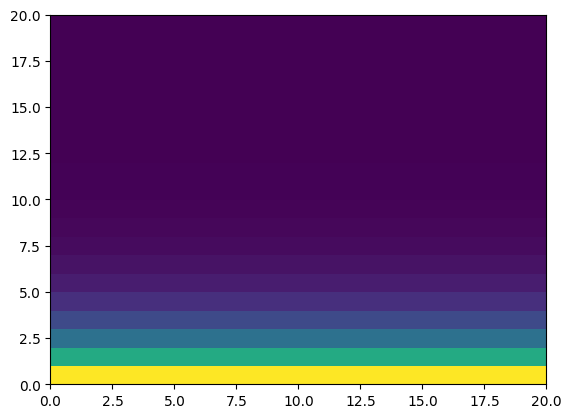

PyObject <matplotlib.collections.QuadMesh object at 0x7f6bc32c0310>

In [69]:
pcolormesh(calor(p,t1)[:, :, 1])

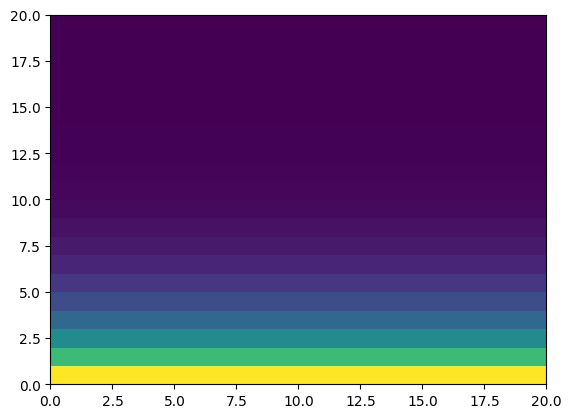

PyObject <matplotlib.collections.QuadMesh object at 0x7f6bc31f9990>

In [70]:
pcolormesh(calor(p,t1)[:, :, 100])

In [71]:
#sin embargo las graficas no tienen una gran diferencia debido a la pequeña diferencia que hay entre un punto a cierto timepo y el tiempo siguiente

In [74]:
q(r,s)= 2r #usamos otra distribucion

q (generic function with 1 method)

In [75]:
calor(q,t1)

20x20x100 Array{Float64,3}:
[:, :, 1] =
  1.0   1.0   1.0   1.0   1.0   1.0  …   1.0   1.0   1.0   1.0   1.0   1.0
  2.0   2.0   2.0   2.0   2.0   2.0      2.0   2.0   2.0   2.0   2.0   2.0
  3.0   3.0   3.0   3.0   3.0   3.0      3.0   3.0   3.0   3.0   3.0   3.0
  4.0   4.0   4.0   4.0   4.0   4.0      4.0   4.0   4.0   4.0   4.0   4.0
  5.0   5.0   5.0   5.0   5.0   5.0      5.0   5.0   5.0   5.0   5.0   5.0
  6.0   6.0   6.0   6.0   6.0   6.0  …   6.0   6.0   6.0   6.0   6.0   6.0
  7.0   7.0   7.0   7.0   7.0   7.0      7.0   7.0   7.0   7.0   7.0   7.0
  8.0   8.0   8.0   8.0   8.0   8.0      8.0   8.0   8.0   8.0   8.0   8.0
  9.0   9.0   9.0   9.0   9.0   9.0      9.0   9.0   9.0   9.0   9.0   9.0
 10.0  10.0  10.0  10.0  10.0  10.0     10.0  10.0  10.0  10.0  10.0  10.0
 11.0  11.0  11.0  11.0  11.0  11.0  …  11.0  11.0  11.0  11.0  11.0  11.0
 12.0  12.0  12.0  12.0  12.0  12.0     12.0  12.0  12.0  12.0  12.0  12.0
 13.0  13.0  13.0  13.0  13.0  13.0     13.0  13.0  13.0  13

In [76]:
t2=linspace(0,10,1000)

linspace(0.0,10.0,1000)

In [77]:
calor(q,t2)

20x20x1000 Array{Float64,3}:
[:, :, 1] =
  1.0   1.0   1.0   1.0   1.0   1.0  …   1.0   1.0   1.0   1.0   1.0   1.0
  2.0   2.0   2.0   2.0   2.0   2.0      2.0   2.0   2.0   2.0   2.0   2.0
  3.0   3.0   3.0   3.0   3.0   3.0      3.0   3.0   3.0   3.0   3.0   3.0
  4.0   4.0   4.0   4.0   4.0   4.0      4.0   4.0   4.0   4.0   4.0   4.0
  5.0   5.0   5.0   5.0   5.0   5.0      5.0   5.0   5.0   5.0   5.0   5.0
  6.0   6.0   6.0   6.0   6.0   6.0  …   6.0   6.0   6.0   6.0   6.0   6.0
  7.0   7.0   7.0   7.0   7.0   7.0      7.0   7.0   7.0   7.0   7.0   7.0
  8.0   8.0   8.0   8.0   8.0   8.0      8.0   8.0   8.0   8.0   8.0   8.0
  9.0   9.0   9.0   9.0   9.0   9.0      9.0   9.0   9.0   9.0   9.0   9.0
 10.0  10.0  10.0  10.0  10.0  10.0     10.0  10.0  10.0  10.0  10.0  10.0
 11.0  11.0  11.0  11.0  11.0  11.0  …  11.0  11.0  11.0  11.0  11.0  11.0
 12.0  12.0  12.0  12.0  12.0  12.0     12.0  12.0  12.0  12.0  12.0  12.0
 13.0  13.0  13.0  13.0  13.0  13.0     13.0  13.0  13.0  1

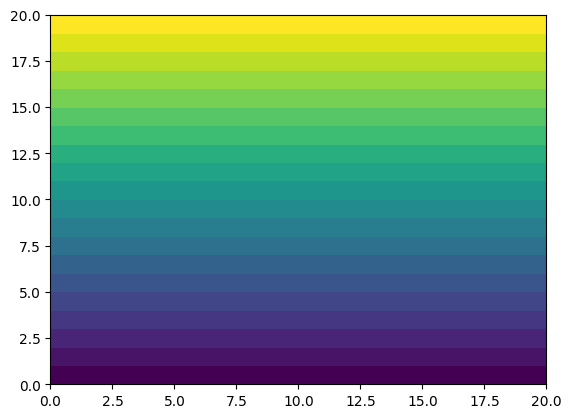

PyObject <matplotlib.collections.QuadMesh object at 0x7f6bc76ad1d0>

In [78]:
pcolormesh(calor(q,t1)[:, :, 1]) #graficamos la segunda distribucion 

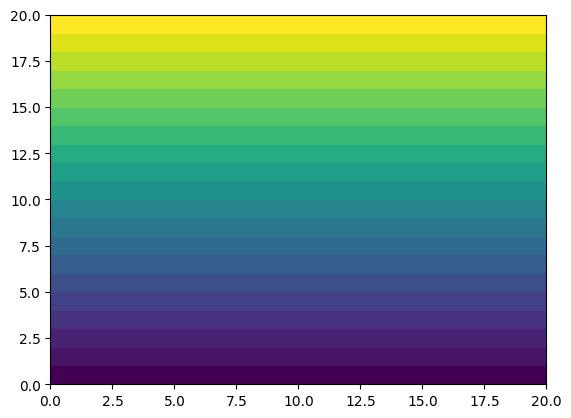

PyObject <matplotlib.collections.QuadMesh object at 0x7f6bc7a26190>

In [82]:
pcolormesh(calor(q,t1)[:, :, 100])

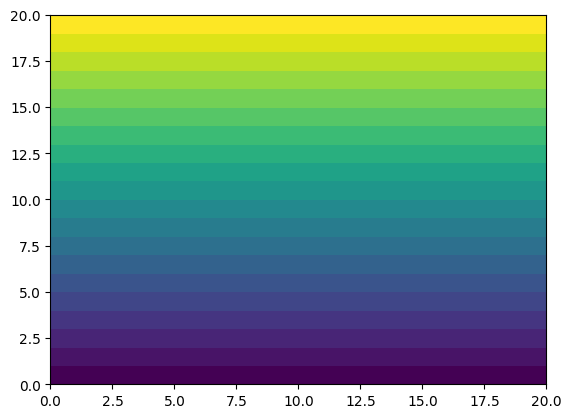

PyObject <matplotlib.collections.QuadMesh object at 0x7f6bcd7a6c90>

In [84]:
pcolormesh(calor(q,t2)[:, :, 10]) #graficamos la segunda distribucion con el segundo intervalo de tiempo

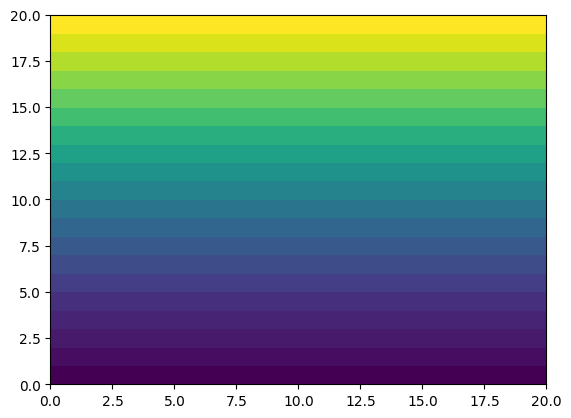

PyObject <matplotlib.collections.QuadMesh object at 0x7f6bc7a3cc90>

In [85]:
pcolormesh(calor(q,t2)[:, :, 1000])

In [ ]:
#podemos notar otra vez que las graficas no varian mucho de igual manera la pequeña diferencia de los puntos de la malla a diferentes timepos

In [1]:
using Plots

LoadError: ArgumentError: Module Plots not found in current path.
Run `Pkg.add("Plots")` to install the Plots package.

In [ ]:
Pkg.add("Plots")

INFO: Initializing package repository /home/juser/.julia/v0.5
INFO: Cloning METADATA from https://github.com/JuliaLang/METADATA.jl


In [21]:
Pkg.add("GR")

INFO: Cloning cache of GR from git://github.com/jheinen/GR.jl.git
INFO: Installing GR v0.19.0
INFO: Building GR
INFO: Downloading pre-compiled GR 0.23.0 Ubuntu binary
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 38.1M  100 38.1M    0     0  6497k      0  0:00:06  0:00:06 --:--:-- 8204k
INFO: Package database updated


In [36]:
gr(show = :ijulia)

:ijulia

In [42]:
@gif for i=1:20
    pcolormesh(calor(p,t1)[:, :, i], key = false)
end

LoadError: UndefVarError: @gif not defined

Lamentablemente no logramos animar las graficas debido a ciertos problemas con Julia "[errno 28] no space left on device" entre otros como el no lograr guardar nuestro cambios y no poder accesar a la platanforma o sacarnos de ella, sin mencionar nuestra dificultad de graficar en coordenadas polares.
Sin embargo, el entendimineto de la programacion para resolver el problema la logramos realizar por lo cual solo nos falto presentarla visualmente. Por todas los inconvenientes y retraso pedimos una disculpa.

Referencias.

[1] http://mmc.geofisica.unam.mx/acl/EDP/F_M/FDM/Introducci%C3%B3n%20al%20M%C3%A9todo%20de%20Diferencias%20Finitas%20y%20su%20Implementaci%C3%B3n%20Computacional.pdf, 21/11/2017,9:19 am